In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
df = pd.DataFrame()

In [3]:
for i in range(20):
  URL = 'https://api.hh.ru/vacancies?text=разработчик&area=1&search_field=name&per_page=100&only_with_salary=True' + '&page={}'.format(str(i))
  part = pd.json_normalize(requests.get(URL).json()['items'])
  df = pd.concat([df, part], axis=0)

In [4]:
df.shape

(2000, 86)

In [5]:
df.index = range(df.shape[0])

In [6]:
print(df[95:102])

            id  premium                                name department  \
95   117012206    False                     Веб-разработчик       None   
96   116479652    False        Frontend-разработчик (Vue 3)       None   
97   116740346    False                     PHP-разработчик       None   
98   116975232    False                Frontend-разработчик       None   
99   116636693    False  Frontend-разработчик junior/intern       None   
100  116326098    False                Frontend-разработчик       None   
101  111882579    False                Frontend-разработчик       None   

     has_test  response_letter_required  address response_url  \
95      False                     False      NaN         None   
96      False                     False      NaN         None   
97      False                     False      NaN         None   
98      False                     False      NaN         None   
99      False                      True      NaN         None   
100     False    

создадим новые датафрейм


In [7]:
data = df[[ 'id', 'name', 'area.name', 'salary.from', 'salary.to', 'salary.gross', 'salary.currency', 'snippet.requirement', 'experience.name']]

Создадим новый столбец с обработанной зп

In [8]:
data['clean_sal'] = data[['salary.from', 'salary.to']].mean(axis=1)

C:\Users\Raisa\AppData\Local\Temp\ipykernel_31064\3270889878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_sal'] = data[['salary.from', 'salary.to']].mean(axis=1)


In [9]:
data[30:40]

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal
30,117031061,Java-разработчик,Москва,250000.0,300000.0,True,RUR,Опыт коммерческой Java-разработки от 3 лет. Ув...,От 3 до 6 лет,275000.0
31,117109172,Разработчик java / back-end (middle+),Москва,300000.0,350000.0,False,RUR,Минимум 3 года опыта работы с языком программи...,От 3 до 6 лет,325000.0
32,115758717,Senior Frontend-разработчик / Лид команды,Москва,350000.0,NaN,False,RUR,Опыт работы с Redux (@reduxjs/toolkit). Опыт р...,От 3 до 6 лет,350000.0
33,115694422,Frontend-разработчик TS/React,Москва,130000.0,170000.0,False,RUR,"Глубокое знание JavaScript, TypeScript и React...",От 1 года до 3 лет,150000.0
34,115915073,Frontend-разработчик/Верстальщик,Москва,200000.0,NaN,False,RUR,Опыт разработки и поддержки сайта на платформе...,От 3 до 6 лет,200000.0
35,116895946,Frontend developer,Москва,120000.0,170000.0,False,RUR,Что ты должен знать и уметь: Опыт работы от 2х...,От 1 года до 3 лет,145000.0
36,116027251,Middle Frontend разработчик,Москва,200000.0,250000.0,False,RUR,Уверенное знание JavaScript (ES6 и выше). Опыт...,От 3 до 6 лет,225000.0
37,117107745,Младший разработчик C#,Москва,NaN,120000.0,False,RUR,Образование высшее или среднее в сфере IT (ком...,Нет опыта,120000.0
38,115721472,Java разработчик / Backend Java Developer (Jun...,Москва,50000.0,70000.0,True,RUR,React. Redux. Module Federation. Node. Java 17...,Нет опыта,60000.0
39,116574300,Разработчик Java,Москва,150000.0,NaN,False,RUR,Опыт работы в роли <highlighttext>разработчика...,От 1 года до 3 лет,150000.0


In [ ]:
def currency(curr_value, mean_val):
    rates = {'EUR': 101.28, 'USD': 91.14, 'CNY': 12.78, 'KZT': 19.79}
    return mean_val * rates.get(curr_value, 1)

data['clean_sal'] = data.apply(lambda x: currency(x['salary.currency'], x['clean_sal']), axis = 1)

<ipython-input-51-74dd2efbbdcc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_sal'] = data.apply(lambda x: currency(x['salary.currency'], x['clean_sal']), axis = 1)


In [10]:
data['clean_sal'][0:10]

0    190000.0
1    340000.0
2    150000.0
3    170000.0
4     70000.0
5    130000.0
6     47500.0
7    135000.0
8    135000.0
9    115000.0
Name: clean_sal, dtype: float64

In [ ]:
data[data['id'] == str(97890240)]

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal,anomaly1,anomaly2,anomaly3,anomaly
1975,97890240,Fullstack Developer,Москва,3800.0,6500.0,True,USD,Язык общения — русский. У некоторых <highlight...,От 3 до 6 лет,469371.0,0,1,1,1


In [11]:
import matplotlib.pyplot as plt

Для выявления наличия аномалий построим боксплот

<Axes: >

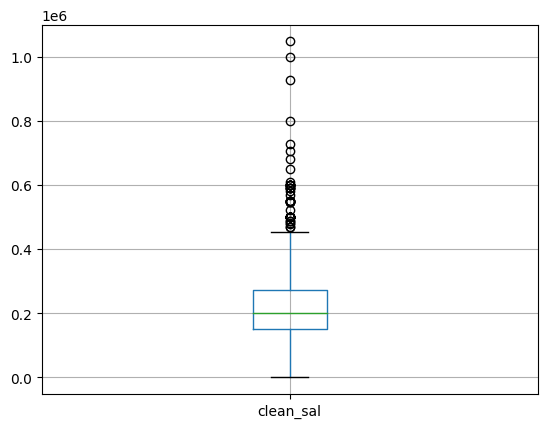

In [ ]:
#plt.boxplot(data['clean_sal'])
data.boxplot(column='clean_sal')

In [12]:
%pip install pyod

     ---------------------------------------- 0.0/169.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/169.6 kB ? eta -:--:--
     ------ ------------------------------ 30.7/169.6 kB 325.1 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/169.6 kB 465.5 kB/s eta 0:00:01
     ----------------------- ------------ 112.6/169.6 kB 726.2 kB/s eta 0:00:01
     ------------------------------------ 169.6/169.6 kB 926.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.7 MB 7.5 MB/s eta 0:00:01
   --- ------------------------------------ 0.3/2.7 MB 4.0 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.7 MB 3.5 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.7 MB 3.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.7 MB 3.2


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pyod

In [14]:
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from pyod.models.iforest import IForest

In [15]:
x_train = data['clean_sal'].values.reshape(-1, 1)

Выберем 3 метода без учителя и найдем аномалии

In [16]:
model_knn = KNN()
model_knn.fit(x_train)

model_pca = PCA()
model_pca.fit(x_train)

model_forest = IForest()
model_forest.fit(x_train)


IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [17]:
data['anomaly1'] = model_knn.labels_
data['anomaly2'] = model_pca.labels_
data['anomaly3'] = model_forest.labels_

C:\Users\Raisa\AppData\Local\Temp\ipykernel_31064\1627193158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['anomaly1'] = model_knn.labels_
C:\Users\Raisa\AppData\Local\Temp\ipykernel_31064\1627193158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['anomaly2'] = model_pca.labels_
C:\Users\Raisa\AppData\Local\Temp\ipykernel_31064\1627193158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [18]:
data['anomaly'] = data[['anomaly1', 'anomaly2', 'anomaly3']].mode(axis=1)

C:\Users\Raisa\AppData\Local\Temp\ipykernel_31064\1080809036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['anomaly'] = data[['anomaly1', 'anomaly2', 'anomaly3']].mode(axis=1)


Проанализируем выявленные аномалии

In [19]:
data['comm'] = ''


C:\Users\Raisa\AppData\Local\Temp\ipykernel_31064\473251835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comm'] = ''


In [20]:
data[data['anomaly'] > 0]

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal,anomaly1,anomaly2,anomaly3,anomaly,comm
6,117112588,Разработчик,Москва,25000.0,70000.0,False,RUR,Знание и умение работать с Unity 3d. Желание у...,Нет опыта,47500.0,1,1,1,1,
11,117006098,Senior Full-stack Developer / Старший фулстак ...,Москва,NaN,1000000.0,False,USD,Внедрить стандарты кодстайла и общие правила д...,От 3 до 6 лет,1000000.0,1,1,1,1,
12,116663126,React разработчик (junior),Москва,NaN,45000.0,False,RUR,"Базовые знания JavaScript (ES6+), HTML5 и CSS3...",Нет опыта,45000.0,1,1,1,1,
16,116787545,Junior Front-end разработчик,Москва,40000.0,60000.0,False,RUR,"Уверенные знания TypeScript, JavaScript, HTML,...",От 1 года до 3 лет,50000.0,0,1,1,1,
17,116763609,Junior Unity-разработчик (Unity Developer),Москва,33000.0,NaN,False,RUR,Уметь работать в Unity. Достаточно хорошо быть...,Нет опыта,33000.0,1,1,1,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,116002994,Программист Bitrix,Москва,50000.0,NaN,True,RUR,"6. Работа с Git, Docker, навыки работы с серве...",От 3 до 6 лет,50000.0,0,1,1,1,
1813,112541171,Lead / Senior C# разработчик (infrastructure),Москва,NaN,600000.0,True,RUR,None,От 3 до 6 лет,600000.0,0,1,1,1,
1827,116478120,Методист-программист,Москва,NaN,30000.0,False,RUR,1. Профильное образование (<highlighttext>прог...,От 1 года до 3 лет,30000.0,0,1,1,1,
1905,116704836,Ведущий Back-end разработчик,Москва,315000.0,420000.0,False,RUR,Опыт работы от 2-х лет на аналогичной должност...,От 3 до 6 лет,367500.0,1,0,1,1,


При достаточно маленькой зп можно предположить, что данные аномалии обусловлены стажировками

In [ ]:
data[data['anomaly'] > 0][data['clean_sal'] <= 40000]
 #[data['clean_sal'] >= 1000]

<ipython-input-152-0115a88ab236>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['anomaly'] > 0][data['clean_sal'] <= 40000]


,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal,anomaly1,anomaly2,anomaly3,anomaly,comm
8,109549522,Junior Frontend-разработчик,Москва,35000.0,NaN,True,RUR,Понятного и отзывчивого интерфейса. + Опыт раб...,От 1 года до 3 лет,35000.0,1,1,1,1,
31,109554077,Junior Java-разработчик,Москва,35000.0,NaN,True,RUR,Опыт работы с Java и Spring Boot. Знание принц...,Нет опыта,35000.0,1,1,1,1,
33,109564037,Junior Backend-разработчик Django,Москва,35000.0,NaN,True,RUR,Опыт работы с Python и Django. Знание принципо...,От 1 года до 3 лет,35000.0,1,1,1,1,
45,106622780,Junior разработчик Front-end,Москва,40000.0,NaN,False,RUR,"Знание JavaScript(ES6+), async/await, generato...",От 1 года до 3 лет,40000.0,1,1,1,1,
104,108200346,Frontend-разработчик,Москва,180.0,NaN,False,GEL,Уверенное знание JavaScript и Typescript. - Оп...,От 1 года до 3 лет,180.0,1,1,1,1,
105,108480617,Стажёр разработчик C# Junior,Москва,30000.0,30000.0,False,RUR,Опыт системного и сетевого администрирования. ...,Нет опыта,30000.0,1,1,1,1,
160,108606822,Junior разработчик сайтов,Москва,35000.0,45000.0,False,RUR,"Уверенные знания HTML5, CSS3. Опыт работы с ​C...",Нет опыта,40000.0,1,1,1,1,
254,108655325,Ассистент веб-разработчика,Москва,30000.0,45000.0,False,RUR,Проактивный подход к жизни и желание работать ...,От 1 года до 3 лет,37500.0,1,1,1,1,
325,109567403,Химик-разработчик косметической продукции (лаб...,Москва,40000.0,NaN,False,RUR,Образование высшее; не законченное высшее в да...,Нет опыта,40000.0,1,1,1,1,
353,107976329,Программист на маркетплейс,Москва,10000.0,NaN,False,RUR,Знание языка программирования Python (предпочт...,От 1 года до 3 лет,10000.0,1,1,1,1,


In [ ]:
ind_lust = data.loc[(data['anomaly'] > 0) & (data['clean_sal'] <= 40000) & (data['clean_sal'] >= 5000)].index
data['comm'].iloc[ind_lust] = "Стажировки"

<ipython-input-153-01de9a8c59c0>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['comm'].iloc[ind_lust] = "Стажировки"
<ipython-input-153-01de9a8c59c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [ ]:
data[data['anomaly'] > 0][data['clean_sal'] <= 40000]

<ipython-input-154-e3064e289195>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['anomaly'] > 0][data['clean_sal'] <= 40000]


,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal,anomaly1,anomaly2,anomaly3,anomaly,comm
8,109549522,Junior Frontend-разработчик,Москва,35000.0,NaN,True,RUR,Понятного и отзывчивого интерфейса. + Опыт раб...,От 1 года до 3 лет,35000.0,1,1,1,1,Стажировки
31,109554077,Junior Java-разработчик,Москва,35000.0,NaN,True,RUR,Опыт работы с Java и Spring Boot. Знание принц...,Нет опыта,35000.0,1,1,1,1,Стажировки
33,109564037,Junior Backend-разработчик Django,Москва,35000.0,NaN,True,RUR,Опыт работы с Python и Django. Знание принципо...,От 1 года до 3 лет,35000.0,1,1,1,1,Стажировки
45,106622780,Junior разработчик Front-end,Москва,40000.0,NaN,False,RUR,"Знание JavaScript(ES6+), async/await, generato...",От 1 года до 3 лет,40000.0,1,1,1,1,Стажировки
104,108200346,Frontend-разработчик,Москва,180.0,NaN,False,GEL,Уверенное знание JavaScript и Typescript. - Оп...,От 1 года до 3 лет,180.0,1,1,1,1,
105,108480617,Стажёр разработчик C# Junior,Москва,30000.0,30000.0,False,RUR,Опыт системного и сетевого администрирования. ...,Нет опыта,30000.0,1,1,1,1,Стажировки
160,108606822,Junior разработчик сайтов,Москва,35000.0,45000.0,False,RUR,"Уверенные знания HTML5, CSS3. Опыт работы с ​C...",Нет опыта,40000.0,1,1,1,1,Стажировки
254,108655325,Ассистент веб-разработчика,Москва,30000.0,45000.0,False,RUR,Проактивный подход к жизни и желание работать ...,От 1 года до 3 лет,37500.0,1,1,1,1,Стажировки
325,109567403,Химик-разработчик косметической продукции (лаб...,Москва,40000.0,NaN,False,RUR,Образование высшее; не законченное высшее в да...,Нет опыта,40000.0,1,1,1,1,Стажировки
353,107976329,Программист на маркетплейс,Москва,10000.0,NaN,False,RUR,Знание языка программирования Python (предпочт...,От 1 года до 3 лет,10000.0,1,1,1,1,Стажировки


При крайне низких зп можно предположить, что в зп перепутана валюта

In [ ]:
data[data['anomaly'] > 0][data['clean_sal'] < 5000]

<ipython-input-155-91221ef2af51>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['anomaly'] > 0][data['clean_sal'] < 5000]


,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal,anomaly1,anomaly2,anomaly3,anomaly,comm
104,108200346,Frontend-разработчик,Москва,180.0,NaN,False,GEL,Уверенное знание JavaScript и Typescript. - Оп...,От 1 года до 3 лет,180.0,1,1,1,1,
1043,109451506,Разработчик лекций по психотерапии в центр ДПО,Москва,1200.0,NaN,False,RUR,Образование: Законченное высшее по специальнос...,От 3 до 6 лет,1200.0,1,1,1,1,
1985,105305581,Программист 1С,Москва,150.0,NaN,False,RUR,Опыт работы с разными ПП 1С в качестве <highli...,От 1 года до 3 лет,150.0,1,1,1,1,


In [ ]:
ind_lust = data.loc[(data['anomaly'] > 0) & (data['clean_sal'] < 5000)].index
data['comm'].iloc[ind_lust] = "неправильная валюта"

<ipython-input-156-c967226e8ead>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['comm'].iloc[ind_lust] = "неправильная валюта"
<ipython-input-156-c967226e8ead>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [ ]:
data[data['anomaly'] > 0][data['clean_sal'] < 5000]

<ipython-input-157-91221ef2af51>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['anomaly'] > 0][data['clean_sal'] < 5000]


,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal,anomaly1,anomaly2,anomaly3,anomaly,comm
104,108200346,Frontend-разработчик,Москва,180.0,NaN,False,GEL,Уверенное знание JavaScript и Typescript. - Оп...,От 1 года до 3 лет,180.0,1,1,1,1,неправильная валюта
1043,109451506,Разработчик лекций по психотерапии в центр ДПО,Москва,1200.0,NaN,False,RUR,Образование: Законченное высшее по специальнос...,От 3 до 6 лет,1200.0,1,1,1,1,неправильная валюта
1985,105305581,Программист 1С,Москва,150.0,NaN,False,RUR,Опыт работы с разными ПП 1С в качестве <highli...,От 1 года до 3 лет,150.0,1,1,1,1,неправильная валюта


Аномалии, имеющие в требованиях "нет опыта" или в названии слова 'Junior', 'Начинающий', тоже можно отправить в подмножество "стажировки"

In [ ]:
data[data['anomaly'] > 0][data['experience.name'].str.contains(r'опыта')]

<ipython-input-158-6fd616bc26b2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['anomaly'] > 0][data['experience.name'].str.contains(r'опыта')]


,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal,anomaly1,anomaly2,anomaly3,anomaly,comm
13,109570793,Стажер-программист,Москва,58000.0,NaN,True,RUR,"C#, знание ООП и основных паттернов программир...",Нет опыта,58000.00,1,1,1,1,
31,109554077,Junior Java-разработчик,Москва,35000.0,NaN,True,RUR,Опыт работы с Java и Spring Boot. Знание принц...,Нет опыта,35000.00,1,1,1,1,Стажировки
58,108636270,Стажер-разработчик | Jr. Developer,Москва,400.0,800.0,True,USD,"React. Redux, react-router, rx-js. Ruby, Ruby ...",Нет опыта,54684.00,1,1,1,1,
78,108724437,Программист-стажер,Москва,45000.0,NaN,False,RUR,Может уделять минимум 30 часов в неделю работе...,Нет опыта,45000.00,1,1,1,1,
88,108297772,Frontend-разработчик (Junior frontend developer),Москва,NaN,50000.0,False,RUR,Базовые знания JavaScript и React. Pixel-perfe...,Нет опыта,50000.00,0,1,1,1,
105,108480617,Стажёр разработчик C# Junior,Москва,30000.0,30000.0,False,RUR,Опыт системного и сетевого администрирования. ...,Нет опыта,30000.00,1,1,1,1,Стажировки
127,109027698,Junior разработчик на ASP.NET Core,Москва,50000.0,NaN,False,RUR,Ищем бэкенд <highlighttext>разработчика</highl...,Нет опыта,50000.00,0,1,1,1,
151,109211992,Программист PHP,Москва,40000.0,65000.0,False,RUR,Основы PHP 8. Работу с MySQL. Принципы объектн...,Нет опыта,52500.00,1,1,1,1,
160,108606822,Junior разработчик сайтов,Москва,35000.0,45000.0,False,RUR,"Уверенные знания HTML5, CSS3. Опыт работы с ​C...",Нет опыта,40000.00,1,1,1,1,Стажировки
186,108898989,Junior AI Developer,Москва,50000.0,80000.0,False,RUR,Умение создавать индивидуальных ассистентов на...,Нет опыта,65000.00,1,1,0,1,


In [ ]:
ind_lust = data.loc[(data['anomaly'] > 0) & (data['experience.name'].str.contains(r'опыта'))].index
data['comm'].iloc[ind_lust] = "Стажировки"

<ipython-input-159-bf06400c6acf>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['comm'].iloc[ind_lust] = "Стажировки"
<ipython-input-159-bf06400c6acf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [ ]:
ind_lust = data.loc[(data['anomaly'] > 0) & (data['name'].str.contains(r'jun'))].index
data['comm'].iloc[ind_lust] = "Стажировки"

<ipython-input-164-89223ec629e0>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['comm'].iloc[ind_lust] = "Стажировки"
<ipython-input-164-89223ec629e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Остальные аномалии обусловлены либо большим опытом работы, либо регионом, либо всем вместе

In [ ]:
data[data['anomaly'] > 0][data['comm'] == '']

<ipython-input-168-86b9afd874c3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['anomaly'] > 0][data['comm'] == '']


,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal,anomaly1,anomaly2,anomaly3,anomaly,comm
15,109453991,Руководитель проектного офиса в крупный девелопер,Москва,700000.0,900000.0,False,RUR,Нужен очень самостоятельный профессионал из де...,От 3 до 6 лет,800000.0,1,1,1,1,
71,109551891,Ведущий программист 1С,Москва,350000.0,400000.0,False,RUR,"Глубокие знания одной из конфигураций: ERP, КА...",От 3 до 6 лет,375000.0,1,0,1,1,
89,108683554,Golang-разработчик,Москва,600000.0,NaN,False,RUR,4+ года опыта на Go. Опыт работы с goroutines ...,От 3 до 6 лет,600000.0,0,1,1,1,
111,109157016,Frontend-разработчик / HTML-верстальщик,Москва,50000.0,NaN,False,RUR,"HTML5, CSS3. Flex, CSS Grid, BEM. SAAS/LESS/ST...",От 1 года до 3 лет,50000.0,0,1,1,1,
116,109047330,IOS-разработчик,Москва,5000.0,6000.0,False,USD,5+ years of experience in iOS <highlighttext>d...,От 3 до 6 лет,501270.0,1,0,1,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,108501599,"Ведущий С/С++ разработчик (офисный формат, Мос...",Москва,350000.0,400000.0,False,RUR,Находимся в поисках Ведущего <highlighttext>ра...,Более 6 лет,375000.0,1,0,1,1,
1955,108352148,Fullstack developer,Москва,NaN,4500.0,False,USD,Уверенные знания TypeScript. Опыт разработки н...,От 3 до 6 лет,410130.0,1,0,1,1,
1962,99221786,Senior C++/Qt/QML разработчик в команду Android,Москва,250000.0,600000.0,False,RUR,"Разрабатываешь на Qt, крайне важен опыт с QML....",От 3 до 6 лет,425000.0,1,0,1,1,
1975,97890240,Fullstack Developer,Москва,3800.0,6500.0,True,USD,Язык общения — русский. У некоторых <highlight...,От 3 до 6 лет,469371.0,1,0,1,1,


In [ ]:
data[data['anomaly'] > 0][data['comm'] == '']['area.name'].unique()

<ipython-input-169-c7ccd537ec4a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['anomaly'] > 0][data['comm'] == '']['area.name'].unique()


array(['Москва', 'Екатеринбург'], dtype=object)

In [ ]:
data[data['anomaly'] > 0][data['area.name'] == 'Екатеринбург']

<ipython-input-171-e8e937f9c7b1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['anomaly'] > 0][data['area.name'] == 'Екатеринбург']


,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal,anomaly1,anomaly2,anomaly3,anomaly,comm
1350,108866405,Senior Java Developer,Екатеринбург,350000.0,400000.0,False,RUR,"Глубокое знание стека, широкий технический кру...",От 3 до 6 лет,375000.0,1,0,1,1,


In [ ]:
ind_lust = data.loc[(data['anomaly'] > 0) & (data['comm'] == '')].index
data['comm'].iloc[ind_lust] = "регион и/или опыт"

<ipython-input-172-99b425bbf98a>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['comm'].iloc[ind_lust] = "регион и/или опыт"
<ipython-input-172-99b425bbf98a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice